# Intro figures
Prototype intro figures

In [1]:
import sys
from collections import OrderedDict

import tempfile
from distutils.dir_util import copy_tree
from sunpy.map import Map
from sunpy.net import Fido,vso,attrs
from sunpy.time import TimeRange
from astropy.time import Time
import datetime
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import astropy.constants as const
import sunpy.sun.constants as sun_const
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
import matplotlib.colors
from astropy.visualization import ImageNormalize, SqrtStretch, AsinhStretch, LogStretch

from synthesizAR.physics import RTVScalingLaws
from hydrad_tools.configure import Configure
from hydrad_tools.parse import Strand,Profile

%matplotlib inline

/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/hydrad_tools/configure/configure.py:20: UserWarning: GitPython not installed. Cannot retrieve base copy from GitHub.
  warnings.warn('GitPython not installed. Cannot retrieve base copy from GitHub.')


In [2]:
sxt_fits = download_file('http://ylstone.physics.montana.edu/archive/yohkoh/ssc_fits/1991/11/18/sx3c_19911118_053757_121.fts',)

In [3]:
sxt_fits

'/var/folders/wz/hhl6rk5s76bfmczhttkt8vbr0000gn/T/tmp9ql1pch_'

In [80]:
q = Fido.search(attrs.Instrument('trace'),attrs.Time(TimeRange(Time('1999-11-06T02:21:00'), b=15*u.s)))

In [81]:
q

<sunpy.net.fido_factory.UnifiedResponse object at 0x1c2d2e6d30>
Results from 1 Provider:

1 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...   Type   Wavelength [2]
                                               ...             Angstrom   
       str19               str19         str5  ...   str8      float64    
------------------- ------------------- ------ ... -------- --------------
1999-11-06 02:21:13 1999-11-06 02:21:13  TRACE ... FULLDISK 171.0 .. 175.0

In [82]:
trace_fits = Fido.fetch(q)

[                                        ========================================


In [170]:
q = Fido.search(attrs.Instrument('eit'),attrs.Time(TimeRange(Time('2006-11-11T18:30:00'), b=10*u.minute)),)

In [31]:
eit_fits = Fido.fetch(q)

[                                        ========================================


In [216]:
q = Fido.search(attrs.Instrument('xrt'),attrs.Time(TimeRange(Time('2010-12-01T18:03:00'), b=120*u.s)),)

In [217]:
q

<sunpy.net.fido_factory.UnifiedResponse object at 0x1c43710fd0>
Results from 1 Provider:

5 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...   Type   Wavelength [2]
                                               ...             Angstrom   
       str19               str19         str6  ...   str8      float64    
------------------- ------------------- ------ ... -------- --------------
2010-12-01 18:03:00 2010-12-01 18:03:00 Hinode ... FULLDISK   8.8 .. 335.0
2010-12-01 18:03:06 2010-12-01 18:03:07 Hinode ... FULLDISK   8.8 .. 335.0
2010-12-01 18:03:38 2010-12-01 18:03:38 Hinode ... FULLDISK   8.8 .. 335.0
2010-12-01 18:03:44 2010-12-01 18:03:46 Hinode ... FULLDISK   8.8 .. 335.0
2010-12-01 18:03:52 2010-12-01 18:03:52 Hinode ... FULLDISK   8.8 .. 335.0

In [218]:
xrt_fits = Fido.fetch(q)

[                                        ========================================


In [234]:
xrt_fits

['/Users/willbarnes/sunpy/data/l1_xrt20101201_180300_9.0.fits',
 '/Users/willbarnes/sunpy/data/l1_xrt20101201_180306_4.fits',
 '/Users/willbarnes/sunpy/data/l1_xrt20101201_180338_5.fits',
 '/Users/willbarnes/sunpy/data/l1_xrt20101201_180344_0.fits',
 '/Users/willbarnes/sunpy/data/l1_xrt20101201_180352_8.0.fits']

/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/sunpy/map/mapbase.py:670: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


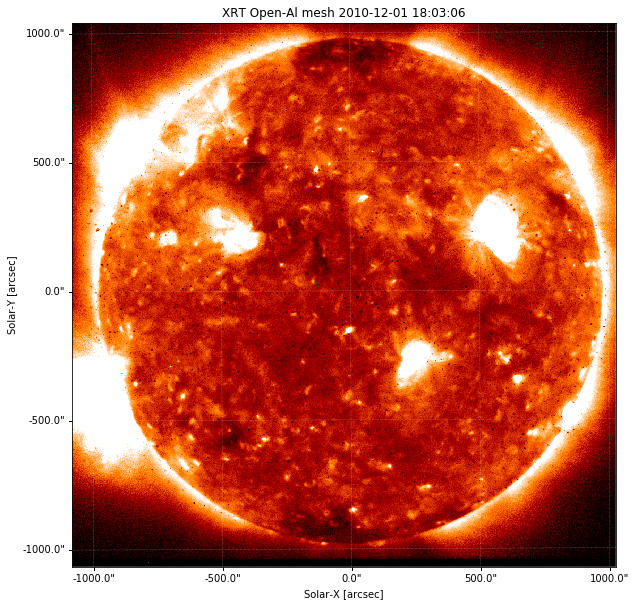

In [249]:
plt.figure(figsize=(10,10))
m = Map(xrt_fits[1])
m.plot(
    norm=ImageNormalize(vmin=max(0,m.data.min()),vmax=0.1*m.data.max(),stretch=AsinhStretch(0.1))
)

In [231]:
q = Fido.search(
    attrs.Instrument('aia'),
    attrs.Time(TimeRange(Time('2010-12-01T19:00:00'), b=10*u.s)),
    attrs.Wavelength(171*u.angstrom,4500*u.angstrom),
)

In [232]:
q

<sunpy.net.fido_factory.UnifiedResponse object at 0x1c48832e10>
Results from 1 Provider:

6 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...   Type    Wavelength [2] 
                                               ...              Angstrom    
       str19               str19         str3  ...   str8       float64     
------------------- ------------------- ------ ... -------- ----------------
2010-12-01 19:00:00 2010-12-01 19:00:01    SDO ... FULLDISK   171.0 .. 171.0
2010-12-01 19:00:00 2010-12-01 19:00:01    SDO ... FULLDISK   211.0 .. 211.0
2010-12-01 19:00:03 2010-12-01 19:00:04    SDO ... FULLDISK   335.0 .. 335.0
2010-12-01 19:00:07 2010-12-01 19:00:08    SDO ... FULLDISK   193.0 .. 193.0
2010-12-01 19:00:08 2010-12-01 19:00:09    SDO ... FULLDISK   304.0 .. 304.0
2010-12-01 19:00:08 2010-12-01 19:00:09    SDO ... FULLDISK 4500.0 .. 4500.0

In [233]:
aia_fits = Fido.fetch(q)

[                                        ========================================


In [242]:
aia_fits

['/Users/willbarnes/sunpy/data/aia_lev1_171a_2010_12_01t19_00_00_34z_image_lev1.fits',
 '/Users/willbarnes/sunpy/data/aia_lev1_211a_2010_12_01t19_00_00_62z_image_lev1.fits',
 '/Users/willbarnes/sunpy/data/aia_lev1_335a_2010_12_01t19_00_03_62z_image_lev1.fits',
 '/Users/willbarnes/sunpy/data/aia_lev1_193a_2010_12_01t19_00_07_84z_image_lev1.fits',
 '/Users/willbarnes/sunpy/data/aia_lev1_304a_2010_12_01t19_00_08_12z_image_lev1.fits',
 '/Users/willbarnes/sunpy/data/aia_lev1_4500a_2010_12_01t19_00_08_40z_image_lev1.fits']

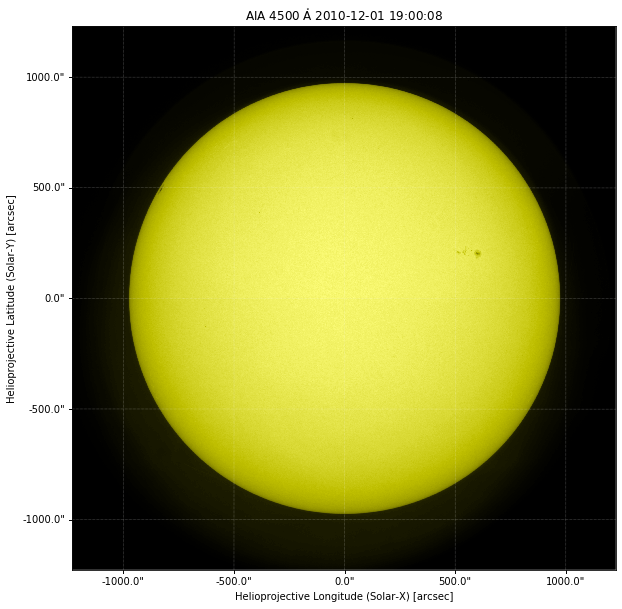

In [251]:
m = Map(aia_fits[-1])
plt.figure(figsize=(10,10))
m.plot(norm=ImageNormalize(vmin=max(0,m.data.min()),
                                             vmax=1*m.data.max(),
                                             stretch=AsinhStretch(0.1)))

In [210]:
q = Fido.search(attrs.Instrument('swap'), attrs.Time(TimeRange(Time('2010-12-01T00:00:00'), b=1.*u.minute+3*u.s)),)

In [211]:
q

<sunpy.net.fido_factory.UnifiedResponse object at 0x1c42b15b38>
Results from 1 Provider:

1 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source Instrument   Type  Wavelength [2]
                                                                     Angstrom   
       str19               str19         str6     str4      str7     float64    
------------------- ------------------- ------ ---------- ------- --------------
2010-12-01 00:00:53 2010-12-01 00:01:03 PROBA2       SWAP FULLSUN 174.0 .. 174.0

In [212]:
swap_fits = Fido.fetch(q)

[                                        ========================================


In [182]:
xrt_map = Map(xrt_fits)
xrt_map = Map(xrt_map.data, {**xrt_map.meta, 'wavelnth': f'{xrt_map.meta["ec_fw1_"]}/{xrt_map.meta["ec_fw2_"]}'})

In [183]:
sxt_map = Map(sxt_fits)

In [184]:
eit_map = Map(eit_fits)

In [185]:
trace_map = Map(trace_fits)
trace_map = Map(trace_map.data, {**trace_map.meta, 'wavelnth':trace_map.meta['wave_len']},)
#trace_map.plot_settings['cmap'] = 'hinodexrt'

In [195]:
aia_map = Map(aia_fits)

In [213]:
swap_map = Map(swap_fits)

In [214]:
all_maps = [sxt_map,eit_map,trace_map,xrt_map,aia_map,swap_map]

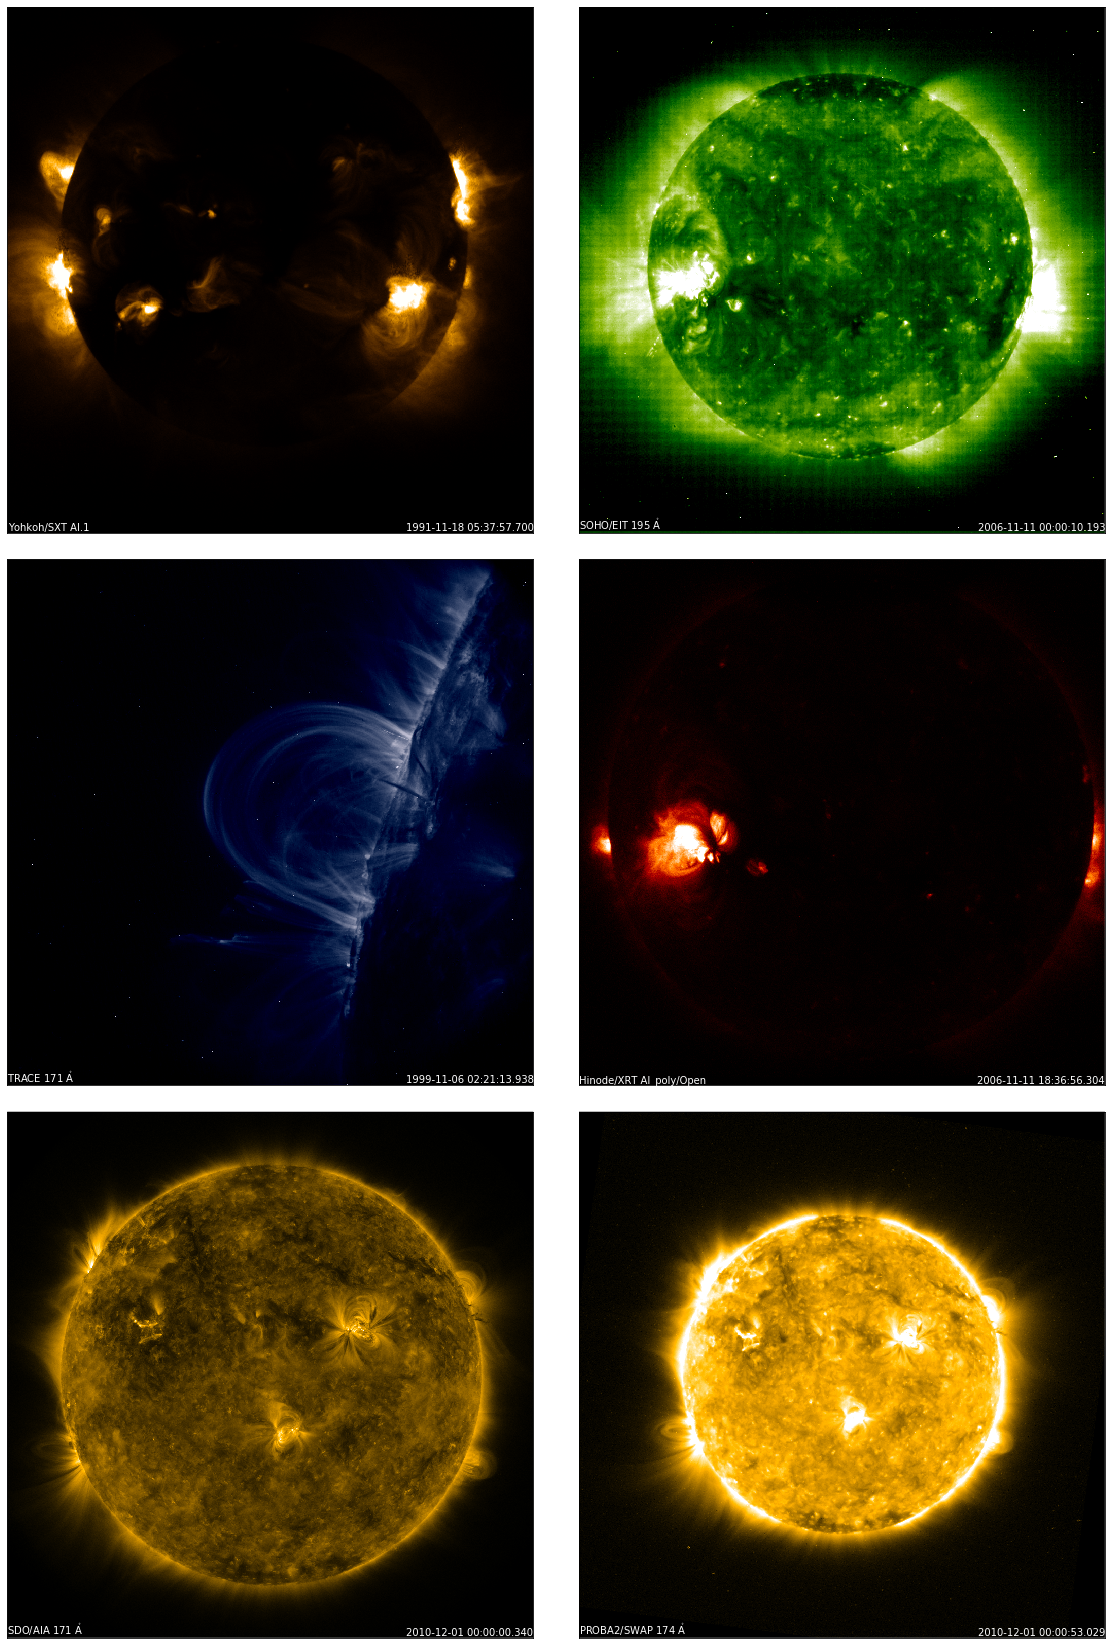

In [265]:
fig = plt.figure(figsize=(20,30))
for i,m in enumerate(all_maps):
    ax = fig.add_subplot(3,2,i+1,projection=m)
    m.plot(axes=ax,norm=ImageNormalize(vmin=max(0,m.data.min()),vmax=m.data.max()*0.25,stretch=AsinhStretch(0.1)),annotate=False,)
    ax.grid(alpha=0)
    lon,lat = ax.coords[0],ax.coords[1]
    lon.set_ticks_visible(False)
    lon.set_ticklabel_visible(False)
    lat.set_ticks_visible(False)
    lat.set_ticklabel_visible(False)
    name = f'{m.observatory}/{m.instrument.split(" ")[0]}' if m.observatory != m.instrument else m.observatory
    try:
        wvl = m.meta['wavelnth'] * u.Angstrom
        wvl = f"{m.meta['wavelnth']} {u.Angstrom.to_string(format='latex')}"
    except ValueError:
        wvl = m.meta['wavelnth']
    ax.text(0,0,f'{name} {wvl}',color='w',horizontalalignment='left',verticalalignment='bottom')
    ax.text(m.dimensions.x.value-0,0,Time(m.date).iso,color='w',horizontalalignment='right',verticalalignment='bottom')
#ax = fig.add_subplot(122,projection=eit_map)
#eit_map.plot(axes=ax,norm=ImageNormalize(vmin=eit_map.data.min(),vmax=eit_map.data.max(),stretch=LogStretch()))
plt.subplots_adjust(hspace=0.05,wspace=0.05)

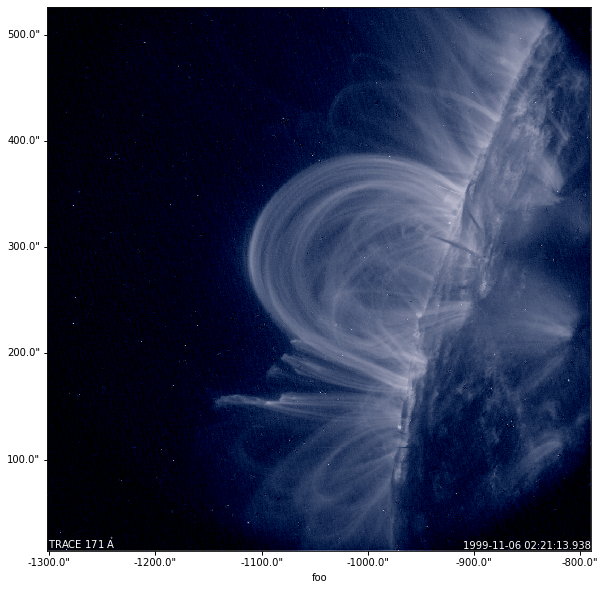

In [247]:
fig = plt.figure(figsize=(10,10))
m = trace_map#.rotate(angle=-90*u.deg)
ax = fig.add_subplot(111,projection=m)
m.plot(axes=ax,norm=ImageNormalize(vmin=max(0,m.data.min()),vmax=m.data.max(),stretch=LogStretch()),annotate=False,)
ax.grid(alpha=0)
lon,lat = ax.coords[0],ax.coords[1]
#lon.set_ticks_visible(False)
#lon.set_ticklabel_visible(False)
#lat.set_ticks_visible(False)
#lat.set_ticklabel_visible(False)
lon.set_axislabel('foo')
name = f'{m.observatory}/{m.instrument.split(" ")[0]}' if m.observatory != m.instrument else m.observatory
try:
    wvl = m.meta['wavelnth'] * u.Angstrom
    wvl = f"{m.meta['wavelnth']} {u.Angstrom.to_string(format='latex')}"
except ValueError:
    wvl = m.meta['wavelnth']
ax.text(0,0,f'{name} {wvl}',color='w',horizontalalignment='left',verticalalignment='bottom')
ax.text(m.dimensions.x.value-0,0,Time(m.date).iso,color='w',horizontalalignment='right',verticalalignment='bottom')
#ax = fig.add_subplot(122,projection=eit_map)
#eit_map.plot(axes=ax,norm=ImageNormalize(vmin=eit_map.data.min(),vmax=eit_map.data.max(),stretch=LogStretch()))
plt.subplots_adjust(hspace=0.05,wspace=0.05)

In [14]:
q = Fido.search(
    attrs.Instrument('HMI'),
    attrs.Time(TimeRange(Time('2010-12-01T19:00:00'), b=30*u.s)),
    vso.attrs.Physobs('LOS_magnetic_field'),
)

In [15]:
q

<sunpy.net.fido_factory.UnifiedResponse object at 0x1c2f1f6ba8>
Results from 1 Provider:

1 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...   Type    Wavelength [2] 
                                               ...              Angstrom    
       str19               str19         str3  ...   str8       float64     
------------------- ------------------- ------ ... -------- ----------------
2010-12-01 19:00:26 2010-12-01 19:00:27    SDO ... FULLDISK 6173.0 .. 6174.0

In [16]:
hmi_fits = Fido.fetch(q)

[                                        ========================================


In [36]:
hmi_fits

['/Users/willbarnes/sunpy/data/hmi_m_45s_2010_12_01_19_01_30_tai_magnetogram.fits']

In [28]:
m_hmi = Map(hmi_fits)
m_hmi = m_hmi.rotate(order=3)
x, y = np.meshgrid(*[np.arange(v.value) for v in m_hmi.dimensions]) * u.pixel
hpc_coords = m_hmi.pixel_to_world(x, y)
r = np.sqrt(hpc_coords.Tx ** 2 + hpc_coords.Ty ** 2) / m_hmi.rsun_obs
mask = np.ma.masked_greater(r, 1)
m_hmi = Map(m_hmi.data, m_hmi.meta, mask=mask.mask)

/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/sunpy/map/mapbase.py:670: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/sunpy/map/mapbase.py:670: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/sunpy/map/mapbase.py:670: Warning: Missing metadata for heliogr

/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/sit

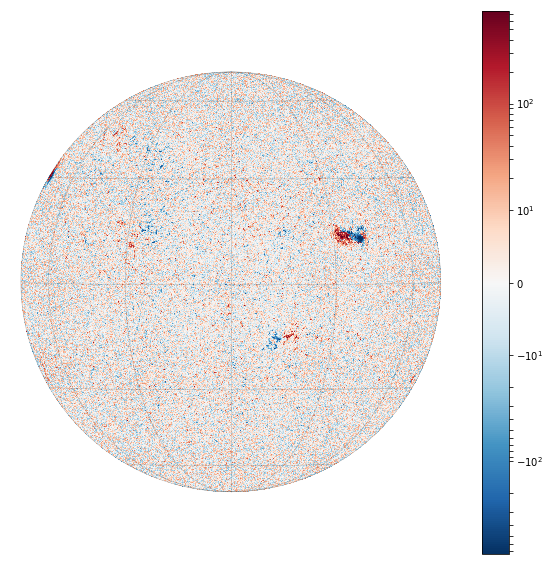

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection=m_hmi)
im = m_hmi.plot(axes=ax,annotate=False,cmap='RdBu_r',norm=matplotlib.colors.SymLogNorm(10, vmin=-7.5e2, vmax=7.5e2))
lon,lat = ax.coords[0], ax.coords[1]
lon.frame.set_linewidth(0)
lat.frame.set_linewidth(0)
lon.set_ticks_visible(False)
lat.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
m_hmi.draw_grid(axes=ax, color='k', alpha=0.25, lw=0.5, grid_spacing=30*u.deg)
plt.colorbar()

## Reconnection Diagram

In [284]:
from matplotlib.path import Path
import matplotlib.patches
import matplotlib.ticker

In [289]:
def remove_ticks_and_spines(ax):
    ax.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
    ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
    ax.yaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
    ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator())
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

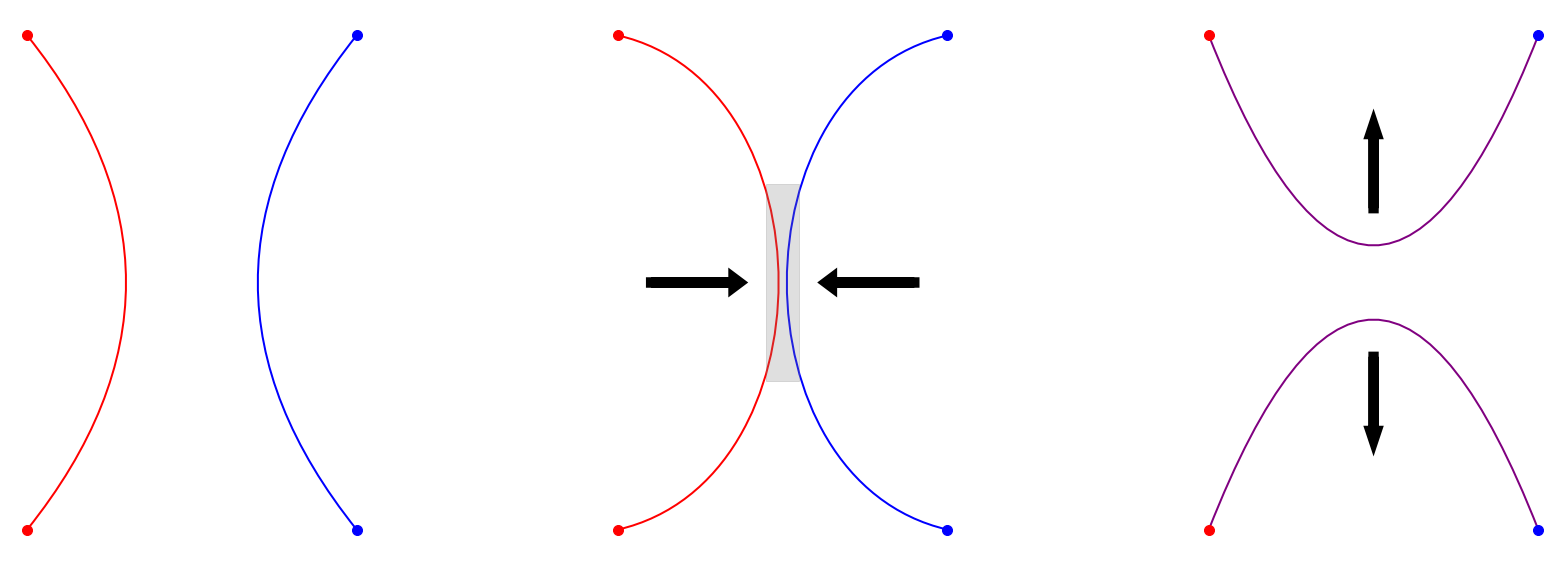

In [353]:
fig = plt.figure(figsize=(30,10))

# Panel 1
ax = fig.add_subplot(131)
ax.set_aspect(aspect=1.5)
remove_ticks_and_spines(ax)
# First curve
patch = matplotlib.patches.PathPatch(
    Path([(0,0),(0.6,0.5),(0,1),],
         [Path.MOVETO,Path.CURVE3,Path.CURVE3,]),
    facecolor='none',edgecolor='r',lw=2)
ax.add_patch(patch)
ax.plot([0,0],[0,1],marker='o',markersize=10,ls='',color='r')
# Second curve
patch = matplotlib.patches.PathPatch(
    Path([(1,0),(0.4,0.5),(1,1),],
         [Path.MOVETO,Path.CURVE3,Path.CURVE3,]),
    facecolor='none',edgecolor='b',lw=2)
ax.add_patch(patch)
ax.plot([1,1],[0,1],marker='o',markersize=10,ls='',color='b')

# Panel 2
ax = fig.add_subplot(132)
ax.set_aspect(aspect=1.5)
remove_ticks_and_spines(ax)
# First curve
patch = matplotlib.patches.PathPatch(
    Path([(0,0),(0.65,0.1),(0.65,0.9),(0,1),],
         [Path.MOVETO,Path.CURVE4,Path.CURVE4,Path.CURVE4]),
    facecolor='none',edgecolor='r',lw=2)
ax.add_patch(patch)
ax.plot([0,0],[0,1],marker='o',markersize=10,ls='',color='r')
# Second curve
patch = matplotlib.patches.PathPatch(
    Path([(1,0),(0.35,0.1),(0.35,0.9),(1,1),],
         [Path.MOVETO,Path.CURVE4,Path.CURVE4,Path.CURVE4]),
    facecolor='none',edgecolor='b',lw=2)
ax.add_patch(patch)
ax.plot([1,1],[0,1],marker='o',markersize=10,ls='',color='b')
# Arrows
ax.arrow(0.1,0.5,0.25,0,lw=10,head_width=0.02,head_length=0.02,edgecolor='k',facecolor='k')
ax.arrow(0.9,0.5,-0.25,0,lw=10,head_width=0.02,head_length=0.02,edgecolor='k',facecolor='k')
# Box
rect = matplotlib.patches.Rectangle((0.45,0.3),0.1,0.4,fill=True,alpha=0.25,color='grey',lw=None)
ax.add_patch(rect)

# Panel 3
ax = fig.add_subplot(133)
ax.set_aspect(aspect=1.5)
remove_ticks_and_spines(ax)
# First curve
patch = matplotlib.patches.PathPatch(
    Path([(0,1),(0.5,0.15),(1,1),],
         [Path.MOVETO,Path.CURVE3,Path.CURVE3]),
    facecolor='none',edgecolor='purple',lw=2)
ax.add_patch(patch)
ax.plot([0,0],[0,1],marker='o',markersize=10,ls='',color='r')
# Second curve
patch = matplotlib.patches.PathPatch(
    Path([(0,0),(0.5,0.85),(1,0),],
         [Path.MOVETO,Path.CURVE3,Path.CURVE3]),
    facecolor='none',edgecolor='purple',lw=2)
ax.add_patch(patch)
ax.plot([1,1],[0,1],marker='o',markersize=10,ls='',color='b')
# Arrows
ax.arrow(0.5,0.65,0,0.15,lw=10,head_width=0.02,head_length=0.02,edgecolor='k',facecolor='k')
ax.arrow(0.5,0.35,0,-0.15,lw=10,head_width=0.02,head_length=0.02,edgecolor='k',facecolor='k')

In [350]:
import seaborn

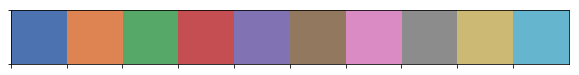

In [355]:
seaborn.palplot(seaborn.color_palette('deep'))

In [358]:
sun_const.equatorial_surface_gravity

<<class 'astropy.constants.constant.Constant'> name='Surface gravity' value=274 uncertainty=0 unit='m / s2' reference="Allen's Astrophysical Quantities 4th Ed.">

In [302]:
@u.quantity_input
def power_law_rad_loss(T: u.K, kind='klimchuk') -> u.erg * u.cm**3 / u.s:
    """
    Raymond-Klimchuk power-law radiative loss function. See Eq. 3 of Klimchuk et al. (2008)
    
    Arguments:
        T {u.K} -- [description]
    
    Returns:
        [type] -- [description]
    """
    log_temperature = np.log10(T.to(u.K).value)

    if kind == 'klimchuk':
        chi = np.ones(T.shape) * 1.96e-27
        alpha = np.ones(T.shape) * 1.0/2.0

        chi = np.where(log_temperature <= 7.63, 5.49e-16, chi)
        alpha = np.where(log_temperature <= 7.63, -1.0, alpha)

        chi = np.where(log_temperature <= 6.90, 3.46e-25, chi)
        alpha = np.where(log_temperature <= 6.90, 1.0/3.0, alpha)

        chi = np.where(log_temperature <= 6.55, 3.53e-13, chi)
        alpha = np.where(log_temperature <= 6.55, -3.0/2.0, alpha)

        chi = np.where(log_temperature <= 6.18, 1.90e-22, chi)
        alpha = np.where(log_temperature <= 6.18, 0.0, alpha)

        chi = np.where(log_temperature <= 5.67, 8.87e-17, chi)
        alpha = np.where(log_temperature <= 5.67, -1.0, alpha)

        chi = np.where(log_temperature <= 4.97, 1.09e-31, chi)
        alpha = np.where(log_temperature <= 4.97, 2.0, alpha)
    elif kind == 'rtv':
        # Not valid above 1e7
        chi = np.ones(T.shape) * np.nan
        alpha = np.ones(T.shape) * np.nan

        chi = np.where(log_temperature <= 7, 10**(-17.73), chi)
        alpha = np.where(log_temperature <= 7, -2/3, alpha)

        chi = np.where(log_temperature <= 6.3, 10**(-21.94), chi)
        alpha = np.where(log_temperature <= 6.3, 0., alpha)

        chi = np.where(log_temperature <= 5.75, 10**(-10.4), chi)
        alpha = np.where(log_temperature <= 5.75, -2.0, alpha)

        chi = np.where(log_temperature <= 5.4, 10**(-21.2), chi)
        alpha = np.where(log_temperature <= 5.4, 0.0, alpha)

        chi = np.where(log_temperature <= 4.9, 10**(-31), chi)
        alpha = np.where(log_temperature <= 4.9, 2, alpha)

        chi = np.where(log_temperature <= 4.6, 10.**(-21.85), chi)
        alpha = np.where(log_temperature <= 4.6, 0.0, alpha)

        # Not valid below 10^4.3
        chi = np.where(log_temperature <= 4.3, np.nan, chi)
    else:
        raise ValueError('Unrecognized power-law fit type.')

    return chi * T.to(u.K).value**alpha * u.erg * u.cm**3 / u.s


In [341]:
def isothermal_loop(s, T, n0, vertical=False):
    L = np.diff(s).sum()
    pis2L = (np.pi*s/2/L).decompose().value
    lambda_p = 2. * const.k_B * T / (1*const.m_p) / sun_const.equatorial_surface_gravity
    Rsol = const.R_sun
    p0 = 2 * const.k_B * n0 * T
    if vertical:
        p = p0 * np.exp(-s/lambda_p/(1 + s/Rsol))
        n = n0 * np.exp(-s/lambda_p/(1 + s/Rsol))
    else:
        p = p0 * np.exp(-2*L*np.sin(pis2L)/np.pi/lambda_p/
                        (1 + 2*L*np.sin(pis2L)/np.pi/Rsol))
        n = n0 * np.exp(-2*L*np.sin(pis2L)/np.pi/lambda_p/
                        (1 + 2*L*np.sin(pis2L)/np.pi/Rsol))
    
    return n, p, n**2 * power_law_rad_loss(T)

In [342]:
s = np.linspace(0, 500, 100)*u.Mm
n0 = 1e10 * u.cm**(-3)
T = 5e4 * u.K

In [339]:
n_v,p_v,e_v = isothermal_loop(s,T,n0,vertical=True)
n_c,p_c,e_c = isothermal_loop(s,T,n0,vertical=False)

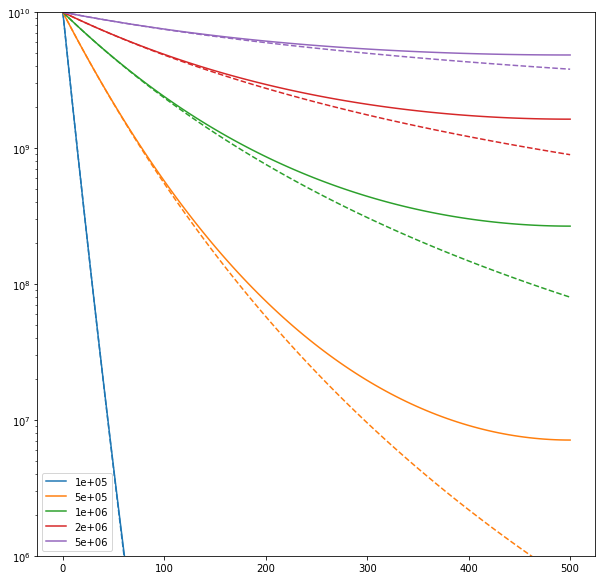

In [351]:
plt.figure(figsize=(10,10))
#plt.subplot(131)
for i,t in enumerate(u.Quantity([1e5,5e5,1e6,2e6,5e6],'K')):
    n_v,p_v,e_v = isothermal_loop(s,t,n0,vertical=True)
    n_c,p_c,e_c = isothermal_loop(s,t,n0,vertical=False)
    plt.plot(s,n_v,color=f'C{i}',ls='--')
    plt.plot(s,n_c,color=f'C{i}',ls='-',label=f"{t.to(u.K).value:1.0g}")
plt.yscale('log')
plt.ylim(1e6,1e10)
plt.legend()
#plt.subplot(132)
#plt.plot(s,p_v.to(u.dyne/u.cm/u.cm))
#plt.plot(s,p_c.to(u.dyne/u.cm/u.cm))
#plt.yscale('log')
#plt.subplot(133)
#plt.plot(s,e_v.to(u.erg/(u.cm**3)/u.s))
#plt.plot(s,e_c.to(u.erg/(u.cm**3)/u.s))
#plt.yscale('log')

## Plasma Beta

In [479]:
def B_gary(h, b_f=2500*u.G, b_s=50*u.G, b_w=1*u.G,
           h_s = 0.5 * u.Mm,h_f = 75 * u.Mm,h_w = 696 * u.Mm,
           wind_correction=False):
    term1 = b_s / (1 + h/h_s)**3 
    term2 = b_f / (1 + h/h_f)**3
    term3 = b_w / (1 + h/h_w)**3 #+ B_patzold(h) if wind_correction else 0*u.G
    return (
        term1 
        + term2 
        + term3
    ) 

def p_gary(h):
    Rsol = const.R_sun
    r = Rsol + h
    p_c, p_k = 1.5 * u.dyn / (u.cm**2), 1e5 * u.dyn / (u.cm**2)
    h_c = (55 * u.Mm) * (r/Rsol)**2
    h_k = 0.12 * u.Mm
    return p_c * np.exp(-h*r/h_c/Rsol) + p_k * np.exp(-h*r/h_k/Rsol)

def B_patzold(h):
    Rsol = const.R_sun
    r = h/Rsol + 1
    #r = np.where(h>2*Rsol,r,np.nan)
    return (6/(r**3) + 1.18/(r**2)) * u.G

def B_gary_alexander(h, k):
    return ((h + const.R_sun) / (k*h + const.R_sun))**2

In [458]:
plage_b = {'b_f': 100*u.G, 'b_s': 50*u.G, 'b_w': 0.005*u.G} 
sunspot_b = {'b_f': 2500*u.G, 'b_s': 50*u.G, 'b_w': 1*u.G}
sunspot_d = {'h_s': 0.5 * u.Mm,'h_f': 75* u.Mm,'h_w': 696 * u.Mm,}

In [459]:
press = p_gary(h,)
b_plage = B_gary(h,**plage_b,wind_correction=False)
b_sunspot = B_gary(h,**sunspot_b,**sunspot_d,wind_correction=False)
beta_plage = press*8*np.pi/(b_plage**2)
beta_sunspot = press*8*np.pi/(b_sunspot**2)

(6e-06, 200.0)

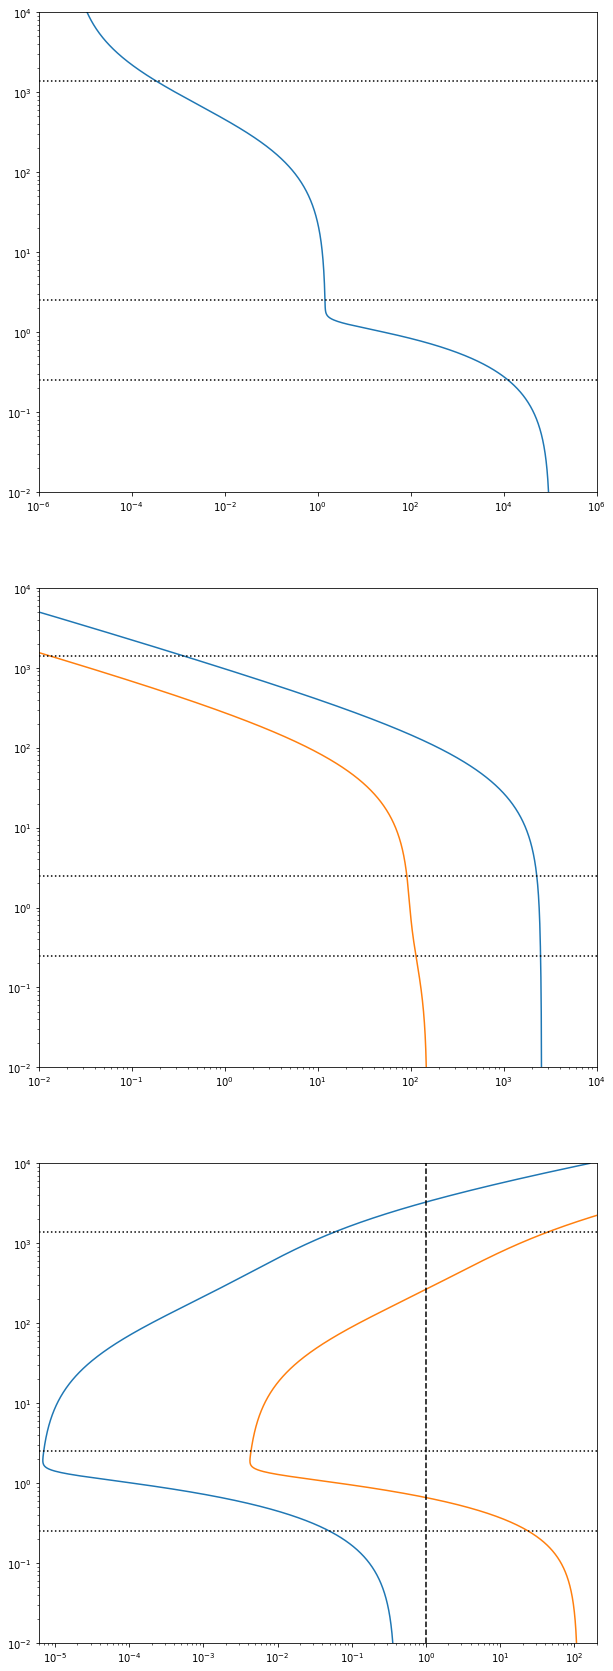

In [364]:
fig,ax = plt.subplots(3,1,figsize=(10,30),sharey=True)
ax[0].plot(press,h)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylim(h[[0,-1]].value)
ax[0].set_xlim(1e-6,1e6)
ax[0].axhline(y=(250*u.km).to(u.Mm).value,ls=':',color='k')
ax[0].axhline(y=(2500*u.km).to(u.Mm).value,ls=':',color='k')
ax[0].axhline(y=(2*const.R_sun).to(u.Mm).value,ls=':',color='k')
#
ax[1].plot(b_sunspot,h)
ax[1].plot(b_plage,h,)
#ax[1].plot(B_patzold(h),h)
ax[1].set_xscale('log')
ax[1].set_xlim(1e-2,1e4)
ax[1].axhline(y=(250*u.km).to(u.Mm).value,ls=':',color='k')
ax[1].axhline(y=(2500*u.km).to(u.Mm).value,ls=':',color='k')
ax[1].axhline(y=(2*const.R_sun).to(u.Mm).value,ls=':',color='k')
#
ax[2].plot(beta_sunspot,h)
ax[2].plot(beta_plage,h)
ax[2].axvline(x=1,ls='--',color='k')
ax[2].axhline(y=(250*u.km).to(u.Mm).value,ls=':',color='k')
ax[2].axhline(y=(2500*u.km).to(u.Mm).value,ls=':',color='k')
ax[2].axhline(y=(2*const.R_sun).to(u.Mm).value,ls=':',color='k')
ax[2].set_xscale('log')
ax[2].set_xlim(6e-6,2e2)

In [17]:
sys.path.append('../thesis/chapter2/python/')
from physics import beta_gary, B_gary, p_gary

In [23]:
h = np.logspace(-2,4,1000) * u.Mm
bp = B_gary(h,kind='plage')
bs = B_gary(h, kind='sunspot')
p = p_gary(h)

In [24]:
@u.quantity_input
def p_gary2(h: u.Mm):
    Rsol = const.R_sun
    r = Rsol + h
    p_c = 1.5 * u.dyn / (u.cm**2)
    p_k = 1e5 * u.dyn / (u.cm**2)
    h_c = (55 * u.Mm) * (r/Rsol)**2
    h_k = 0.12 * u.Mm
    return p_c * np.exp(-h*r/h_c/Rsol) + p_k * np.exp(-h*r/h_k/Rsol)

In [25]:
@u.quantity_input
def B_gary2(h: u.Mm, kind='sunspot'):
    h_s = 0.5 * u.Mm
    h_f = 75 * u.Mm
    h_w = 696 * u.Mm
    if kind == 'plage':
        b_f = 100*u.G
        b_s = 50*u.G
        b_w = 0.005*u.G
    elif kind == 'sunspot':
        b_f = 2500*u.G
        b_s = 50*u.G
        b_w = 1*u.G
    else:
        raise ValueError(f'Unrecognized kind: {kind}')

    return b_s / (1 + h/h_s)**3 + b_f / (1 + h/h_f)**3 + b_w / (1 + h/h_w)**3

In [26]:
bp_2 = B_gary2(h,kind='plage')
bs_2 = B_gary2(h,kind='sunspot')
p_2 = p_gary2(h)

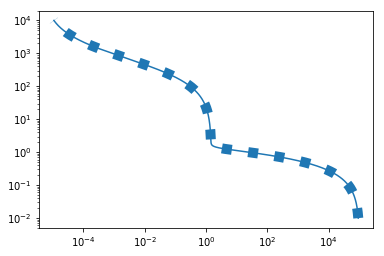

In [28]:
plt.plot(p,h,color='C0')
plt.plot(p_2,h,color='C0',ls=':',lw=10)
plt.xscale('log')
plt.yscale('log')

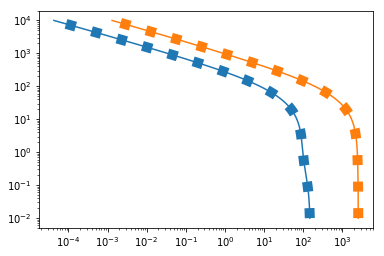

In [21]:
plt.plot(bp,h,color='C0')
plt.plot(bs,h,color='C1')
plt.plot(bp_2,h,ls=':',lw=10,color='C0')
plt.plot(bs_2,h,ls=':',lw=10,color='C1')
plt.xscale('log')
plt.yscale('log')

/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/sunpy/map/mapbase.py:670: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/sunpy/map/mapbase.py:671: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  radius=self.dsun,
/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  return SkyCoord(lat=self.heliographic_latitude,
/Users/willbarnes/anaconda/envs/dissertation/lib/python3.7/site-packages/sunpy/map/mapbase.py:670: Warning: Miss

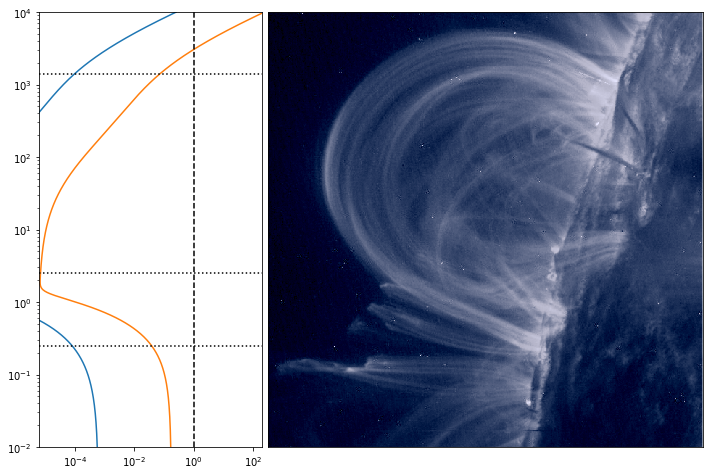

In [33]:
fig = plt.figure(figsize=(12,8))
m_trace = Map('../thesis/chapter2/data/trace_example.fits')
m_trace = m_trace.submap(
    SkyCoord(Tx=-1150*u.arcsec,Ty=100*u.arcsec,frame=m_trace.coordinate_frame),
    SkyCoord(Tx=-850*u.arcsec,Ty=400*u.arcsec,frame=m_trace.coordinate_frame),
)

# Beta
ax = plt.subplot2grid((1,3),(0,0),)
ax.plot(beta_gary(h,'sunspot'),h)
ax.plot(beta_gary(h,'plage'),h)
ax.axvline(x=1,ls='--',color='k')
ax.axhline(y=(250*u.km).to(u.Mm).value,ls=':',color='k')
ax.axhline(y=(2500*u.km).to(u.Mm).value,ls=':',color='k')
ax.axhline(y=(2*const.R_sun).to(u.Mm).value,ls=':',color='k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(6e-6,2e2)
ax.set_ylim(1e-2,1e4)

# TRACE
ax = plt.subplot2grid((1,3),(0,1),colspan=2,projection=m_trace)
m_trace.plot(axes=ax,annotate=False,
             norm=ImageNormalize(vmin=max(0,m_trace.data.min()),vmax=0.15*m_trace.data.max(),stretch=SqrtStretch()))
ax.grid(alpha=0)
lon,lat = ax.coords[0],ax.coords[1]
lon.set_ticks_visible(False)
lat.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticklabel_visible(False)
plt.subplots_adjust(wspace=0)

## RTV Scaling Laws

In [393]:
chi0 = 10**(-18.8)*u.erg*u.cm**3*u.K**(1/2)/u.s
kappa0 = 1e-6*u.erg/u.cm/u.s/(u.K**(7/2))
c1 = ((3/const.k_B) * np.sqrt(chi0/kappa0/2))**(1/3)
c2 = 7*chi0/8/const.k_B**2/c1**(5/2)

In [394]:
(c1.cgs * (u.dyne/u.cm)**(1/3)).decompose().cgs

<Quantity 1828.8343703 K>

In [397]:
c2.cgs.to(u.erg**(-1/6)*u.cm**(4/3)/u.s)

<Quantity 50863.45439458 cm(4/3) / (erg(1/6) s)>

In [389]:
p0 = np.logspace(-2,3,100) * u.dyne/(u.cm**2)
L = u.Quantity([1e9,1e10,1e11],'cm')
#for l in L:
rtv = RTVScalingLaws(L[0],p0[0],)

In [386]:
rtv.c1.cgs.to(u.K*u.cm**(1/3)/u.dyne**(1/3))

<Quantity 1828.8343703 cm(1/3) K / dyn(1/3)>

In [390]:
rtv = RTVScalingLaws(L[0],pressure=p0,)

In [391]:
rtv.max_temperature

<Quantity [  394010.42097015,   409583.75689282,   425772.63184404,
             442601.37511956,   460095.27763514,   478280.62993472,
             497184.76170093,   516836.08282725,   537264.12611354,
             558499.59164911,   580574.39295007,   603521.70492027,
             627376.01370785,   652173.16853245,   677950.43556082,
             704746.55391199,   732601.79387592,   761558.01743339,
             791658.74116778,   822949.20166364,   855476.42349002,
             889289.2898709 ,   924438.61614885,   960977.22615243,
             998960.03158194,  1038444.11453295,  1079488.81328159,
            1122155.81146048,  1166509.23075945,  1212615.72729014,
            1260544.59175952,  1310367.8536028 ,  1362160.38923214,
            1416000.03456395,  1471967.70199386,  1530147.50199517,
            1590626.8695234 ,  1653496.69541715,  1718851.46299247,
            1786789.39003624,  1857412.57641183,  1930827.15749888,
            2007143.46369786,  2086476.18623905,

(0.01, 1000.0)

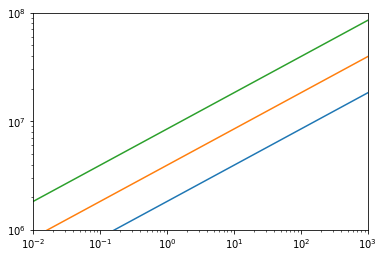

In [392]:
for l in L:
    rtv = RTVScalingLaws(l,pressure=p0)
    plt.plot(p0,rtv.max_temperature)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e6,1e8)
plt.xlim(1e-2,1e3)

## Hydrostatic

In [443]:
base_config = {
    'general': {
        'total_time': 1 * u.s,
        'loop_length': 90 * u.Mm,
        'footpoint_height': 5e8 * u.cm,
        'output_interval': 5*u.s,
        'loop_inclination': 0*u.deg,
        'logging_frequency': 1000,
        'write_file_physical': True,
        'write_file_ion_populations': False,
        'write_file_hydrogen_level_populations': False,
        'write_file_timescales': False,
        'write_file_equation_terms': False,
        'heat_flux_limiting_coefficient': 1./6.,
        'heat_flux_timestep_limit': 1e-10*u.s,
        'use_kinetic_model': False,
        'minimum_collisional_coupling_timescale': 0.01*u.s,
        'force_single_fluid': False,
        #'tabulated_gravity_profile':,
        #'tabulated_cross_section_profile':,
    },
    'initial_conditions': {
        'footpoint_temperature': 2e4 * u.K,
        'footpoint_density': 1e11 * u.cm**(-3),
        'isothermal': False,
        'heating_location': 45*u.Mm,
        'heating_scale_height': 10*u.Mm,
        'heating_range_lower_bound': 1e-8*u.erg/u.s/(u.cm**3),
        'heating_range_upper_bound': 1e2*u.erg/u.s/(u.cm**3),
        'heating_range_step_size': 0.01,
        'heating_range_fine_tuning': 10000.0,
        'use_poly_fit_gravity': False,
    },
    'radiation': {
        'use_power_law_radiative_losses': True,
        'decouple_ionization_state_solver': False,
        'density_dependent_rates': False,
        'optically_thick_radiation': False,
        'nlte_chromosphere': False,
        'ranges_dataset': 'ranges',
        'emissivity_dataset': 'chianti_v7',
        'abundance_dataset': 'asplund',
        'rates_dataset': 'chianti_v7',
        'elements_equilibrium': [],
        'elements_nonequilibrium': [],
    },
    'heating': {
        'heat_electrons': True,
        'background_heating': True,
        'beam_heating': False,
        'alfven_wave_heating': False,
    },
    'solver': {
        'epsilon': 0.01,
        'safety_radiation': 0.1,
        'safety_conduction': 1.0,
        'safety_advection': 1.0,
        'safety_atomic': 1.0,
        'safety_viscosity': 1.0,
        'cutoff_ion_fraction':1e-6,
        'epsilon_d':0.1,
        'epsilon_r':1.8649415311920072,
        'timestep_increase_limit': 0.05,
        'relative_viscous_timescale': None,
        'minimum_radiation_temperature': 2e4*u.K,
        'zero_over_temperature_interval': 5.0e2*u.K,
        'minimum_temperature': 1e4*u.K,
        'maximum_optically_thin_density': 1e12*u.cm**(-3),
    },
    'grid': {
        'adapt': True,
        'adapt_every_n_time_steps': 10,
        'minimum_cells': 150,
        'maximum_cells': 30000,
        'maximum_refinement_level': 12,
        'minimum_delta_s': 1.0*u.cm,
        'maximum_variation': 0.1,
        'refine_on_density': True,
        'refine_on_electron_energy': True,
        'refine_on_hydrogen_energy': False,
        'minimum_fractional_difference': 0.1,
        'maximum_fractional_difference': 0.2,
        'linear_restriction': True,
        'enforce_conservation': False,
    }
} 

In [444]:
c = Configure(base_config)

In [445]:
import shutil
import os
HYDRAD_DIR = '/Users/willbarnes/Documents/work/codes/HYDRAD/'

In [446]:
with tempfile.TemporaryDirectory() as tmpdir:
    tmpdir_hydrad = os.path.join(tmpdir,'hydrad')
    shutil.copytree(HYDRAD_DIR, tmpdir_hydrad)
    c.setup_initial_conditions(tmpdir_hydrad, execute=True, verbose=False)
    shutil.copyfile(os.path.join(tmpdir_hydrad,'Initial_Conditions','profiles','initial.amr'),
                    os.path.join(tmpdir_hydrad,'Results','profile0.amr'))
    shutil.copyfile(os.path.join(tmpdir_hydrad,'Initial_Conditions','profiles','initial.amr.phy'),
                    os.path.join(tmpdir_hydrad,'Results','profile0.phy'))
    p = Profile(tmpdir_hydrad,index=0)

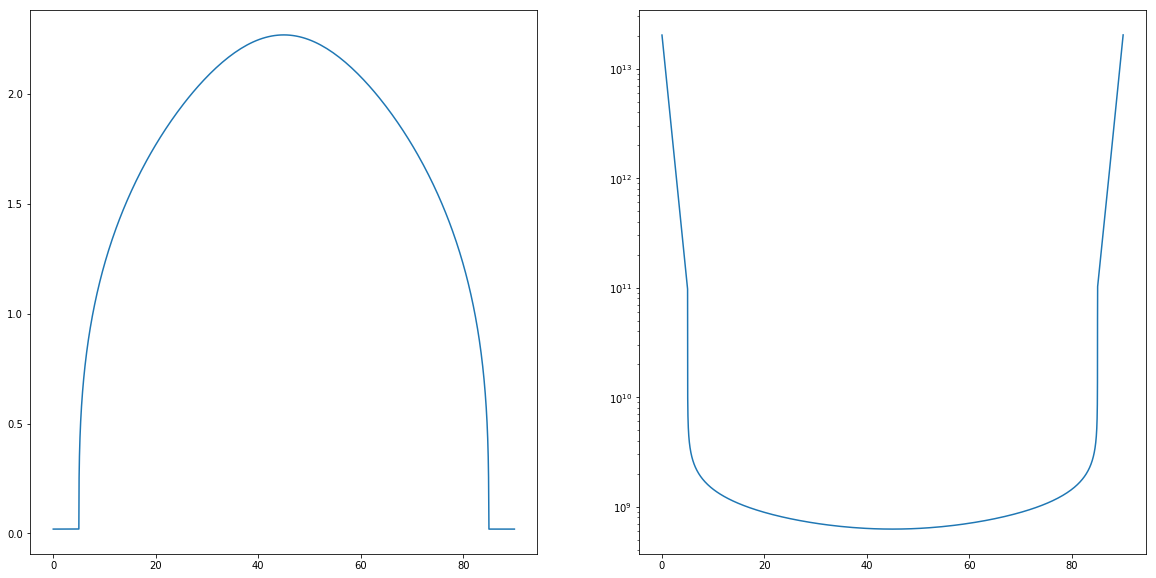

In [447]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(p.coordinate.to(u.Mm),p.electron_temperature.to(u.MK))
plt.subplot(122)
plt.plot(p.coordinate.to(u.Mm),p.electron_density)
plt.yscale('log')

In [43]:
from synthesizAR.atomic import EmissionModel
import pandas as pd
import plasmapy.atomic
import astropy.io
from astropy.table import Table

In [46]:
em = EmissionModel.restore('../thesis/chapter6/data/base_emission_model.json')
data = {'Element': [], 'Number of Ions': [], 'Number of Transitions': [],}
for i in em:
    if not hasattr(i.transitions, 'wavelength'):
        continue
    data['Element'].append(i.atomic_symbol)
    data['Number of Ions'].append(1)
    data['Number of Transitions'].append(i.transitions.wavelength.shape[0])
df = pd.DataFrame(data=data).groupby('Element').sum().reset_index()
z = df['Element'].map(plasmapy.atomic.atomic_number)
df = df.assign(z = z).sort_values(by='z', axis=0).drop(columns='z')

In [63]:
writer = astropy.io.ascii.Latex(latexdict = {'data_start':r'\begin{tabularx}', 'data_end': r'\end{tabularx}'})

In [73]:
astropy.io.ascii.write(
    Table.from_pandas(df),
    caption='foo',
    #Writer=astropy.io.ascii.Latex,
    format='latex',
    latexdict = {'data_start':r'\midrule', 'data_end': r'\bottomrule', 'header_start': r'\toprule', 'col_align': 'ccc',
                 'preamble':r'\begin{center}','tablefoot':r'\end{center}'}
)

\begin{table}
\begin{center}
\caption{foo}
\begin{tabular}{ccc}
\toprule
Element & Number of Ions & Number of Transitions \\
\midrule
O & 8 & 11892 \\
Mg & 11 & 31965 \\
Si & 13 & 30047 \\
S & 16 & 33091 \\
Ca & 17 & 42823 \\
Fe & 25 & 553541 \\
Ni & 19 & 83517 \\
\bottomrule
\end{tabular}
\end{center}
\end{table}


## VAL Atmosphere

In [74]:
valc = np.loadtxt('hydrad_2019-03-09_17.24.54/Radiation_Model/atomic_data/OpticallyThick/VAL_atmospheres/VAL.T',skiprows=1)

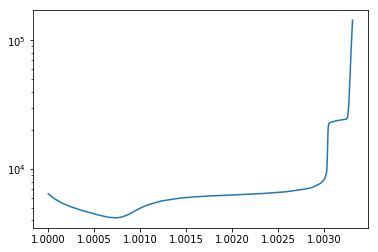

In [81]:
plt.plot(valc[:,0]*u.cm/const.R_sun+1,valc[:,1])
#plt.xscale('log')
plt.yscale('log')

In [2]:
sys.path.append('../thesis/chapter1/python/')
from hs_atmosphere import read_VAL3c_MTW, interpolate_atmosphere

In [16]:
data = read_VAL3c_MTW(
    '../thesis/chapter1/data/VALIIIC.dat',
    MTW_file='../thesis/chapter1/data/mcwhirter.dat'
)
atmos = interpolate_atmosphere(data,data['Z'])

In [5]:
data['n_e'].to('cm^-3')

<Quantity [1.20400000e+08, 4.64500000e+07, 1.54700000e+07, 6.43300000e+06,
           2.12200000e+06, 1.06600000e+06, 2.12200000e+06, 6.47600000e+05,
           2.67400000e+05, 1.11000000e+05, 4.51600000e+04, 1.73300000e+04,
           1.11200000e+04, 8.08500000e+03, 7.66400000e+03, 8.83800000e+03,
           1.06400000e+04, 1.04900000e+04, 1.04100000e+04, 9.34900000e+03,
           8.10800000e+03, 7.48600000e+03, 7.60000000e+03, 6.45600000e+03,
           6.00500000e+03, 4.77100000e+03, 4.02800000e+03, 3.85800000e+03,
           3.81100000e+03, 3.79200000e+03, 3.78300000e+03, 3.78000000e+03,
           3.79900000e+03, 3.70500000e+03, 3.53500000e+03, 3.30600000e+03,
           2.62000000e+03, 2.40200000e+03, 2.27600000e+03, 2.21900000e+03,
           2.12000000e+03, 2.00900000e+03, 1.94300000e+03, 1.88100000e+03,
           1.81200000e+03, 1.67700000e+03, 1.49800000e+03, 1.31800000e+03,
           9.99300000e+03, 5.96100000e+02, 3.83900000e+02, 1.47234206e+09,
           1.29113867e+09

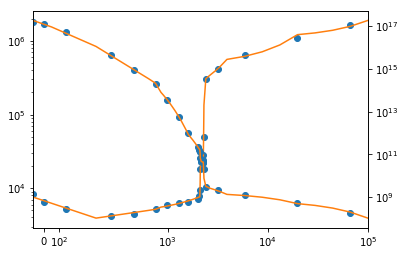

In [42]:
plt.plot(data['Z'],data['T'],marker='o',ls='',markevery=3)
plt.plot(atmos['Z'], atmos['T'],)
plt.xlim(data['Z'][[0,-1]])
plt.xscale('symlog',linthreshx=7.5e2)
plt.yscale('log')
ax = plt.gca().twinx()
plt.plot(data['Z'],(data['p']/const.k_B/data['T']).to('cm^-3'),marker='o',ls='',markevery=3)
plt.plot(atmos['Z'],(atmos['p']/const.k_B/atmos['T']).to('cm^-3'))
ax.set_yscale('log')
ax.set_xlim(data['Z'][[0,-1]])
ax.set_xscale('symlog',linthreshx=7.5e2)

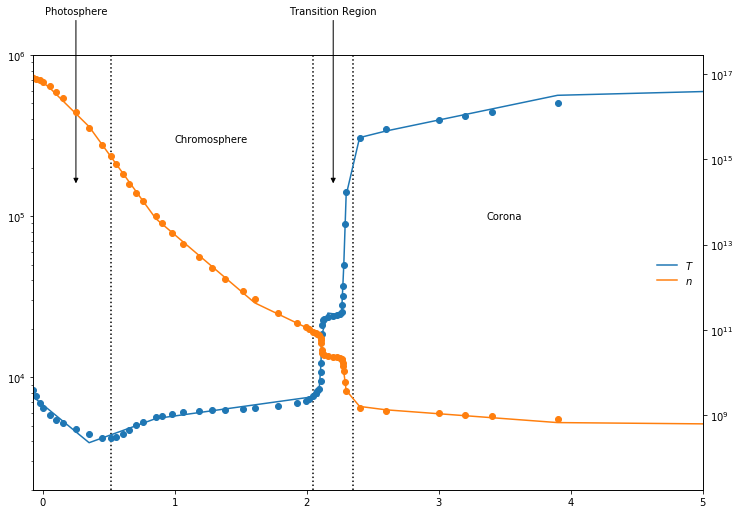

In [168]:
data = read_VAL3c_MTW(
    '../thesis/chapter1/data/VALIIIC.dat',
    MTW_file='../thesis/chapter1/data/mcwhirter.dat'
)
Z = data['Z'].to(u.Mm)
atmos = interpolate_atmosphere(data, Z)

# Setup figure
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
ax2 = ax.twinx()

# Plot
ax.plot(Z, data['T'].to(u.K), color='C0', marker='o', ls='')
line_T = ax.plot(Z, atmos['T'].to(u.K), color='C0', ls='-', label=r'$T$')
ax2.plot(Z, (data['p']/const.k_B/2/data['T']).to('cm^-3'),
         color='C1', marker='o', ls='')
line_n = ax2.plot(Z, (atmos['p']/const.k_B/2/atmos['T']).to('cm^-3'),
                  color='C1', ls='-', label=r'$n$')

i_tmin = np.argmin(data['T'])

# Labels
#ax.set_xlabel(r'$h$ $[\si{\mega\m}]$')
#ax.set_ylabel(r'$T$ $[\si{\kelvin}]$')
#ax2.set_ylabel(r'$n$ $[\si{\per\cubic\cm}]$')
ax.set_xlim(Z[0].value,(5*u.Mm).value)
ax2.set_xlim(Z[0].value,(5*u.Mm).value)
ax.set_ylim(2e3,1e6)
#ax.set_xscale('symlog', linthreshx=1)
#ax2.set_xscale('symlog', linthreshx=1)
ax.set_yscale('log')
ax2.set_yscale('log')

# Legend
lns = line_T + line_n
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, loc='center right')

# Annotations
ax.annotate('Photosphere',
            xytext=(0.25,1.1), textcoords=('data','axes fraction'),
            xy=(0.25,0.7), xycoords=('data','axes fraction'),
            va='center',ha='center',
            arrowprops=dict(arrowstyle="-|>", color='k'),

)
ax.annotate('Chromosphere',
            xy=(1,3e5),xycoords='data',
            va='center',ha='left',
)
ax.annotate('Transition Region',
           xytext=(2.2,1.1), textcoords=('data','axes fraction'),
           xy=(2.2,0.7), xycoords=('data','axes fraction'),
           va='center',ha='center',
           arrowprops=dict(arrowstyle="-|>", color='k'),
)
ax.annotate('Corona',
            xy=(3.5,1e5),xycoords='data',
            va='center',ha='center',
)

ax.vlines([Z[i_tmin].value, 2.05, 2.35],2e3,1e6,colors='k',linestyles='dotted',)

In [137]:
data['Z'][i_tmin]

515.0

In [138]:
i_tmin

10

In [139]:
data['Z']

<Column name='Z' dtype='float64' unit='km' length=65>
   -75.0
   -50.0
   -25.0
     0.0
    50.0
   100.0
   150.0
   250.0
   350.0
   450.0
   515.0
   555.0
     ...
  3000.0
  3200.0
  3400.0
  3900.0
  5860.0
  8790.0
 13200.0
 19800.0
 29700.0
 44500.0
 66800.0
100000.0

## Interior diagram

In [61]:
from matplotlib.patches import Wedge
import seaborn

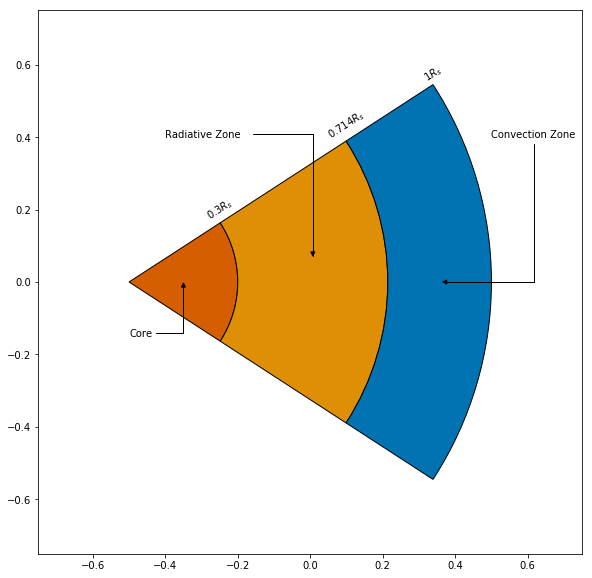

In [107]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
xcen,ycen = -0.5,0
theta = 33
theta_rad = theta * np.pi/180
ctheta = np.cos(theta * np.pi/180)
stheta = np.sin(theta*np.pi/180)

# Core
w_c = Wedge((xcen,ycen),0.3,-theta,theta,facecolor=seaborn.color_palette('colorblind')[3],edgecolor='k')
ax.add_patch(w_c)
ax.text(0.3*ctheta+xcen, 0.3*stheta+ycen,
        r'$0.3R_s$',
        verticalalignment='bottom', horizontalalignment='center',
        rotation=theta)
ax.annotate('Core',
            xy=(xcen + 0.3/2, ycen),xycoords='data',
            xytext=(xcen,-0.15+ycen),textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                color='k',
                shrinkA=15, shrinkB=0,
                patchA=None,
                patchB=None,
                connectionstyle='angle,angleA=180,angleB=-90,rad=0',
            ),
)

# Radiative zone
w_r = Wedge((xcen,ycen),0.714,-theta,theta,width=0.714-0.3,facecolor=seaborn.color_palette('colorblind')[1],edgecolor='k')
ax.add_patch(w_r)
ax.text(0.714*ctheta+xcen, 0.714*stheta+ycen,
        r'$0.714R_s$',
        verticalalignment='bottom', horizontalalignment='center',
        rotation=theta)
ax.annotate('Radiative Zone',
            xy=(xcen + 0.3 + (0.714-0.3)/2, ycen),xycoords='data',
            xytext=(xcen+0.1,ycen+0.4),textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                color='k',
                shrinkA=50, shrinkB=25,
                patchA=None,
                patchB=None,
                connectionstyle='angle,angleA=180,angleB=-90,rad=0',
            ),
)

# Convection zone
w_con = Wedge((xcen,ycen),1,-theta,theta,width=1-0.714,facecolor=seaborn.color_palette('colorblind')[0],edgecolor='k')
ax.add_patch(w_con)
ax.text(1*ctheta+xcen, 1*stheta+ycen,
        r'$1R_s$',
        verticalalignment='bottom', horizontalalignment='center',
        rotation=theta)
ax.annotate('Convection Zone',
            xy=(xcen + 0.714 + (1-0.714)/2, ycen),xycoords='data',
            xytext=(xcen+1,ycen+0.4),textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                color='k',
                shrinkA=10, #shrinkB=25,
                patchA=None,
                patchB=None,
                connectionstyle='angle,angleA=-90,angleB=180,rad=0',
            ),
)

# Axes
ax.set_ylim(-0.75,0.75)
ax.set_xlim(-0.75,0.75)
ax.set_aspect('equal')

In [113]:
((1.527e5*u.kg/(u.m**3)).to(u.g/u.cm**3)/const.m_p).decompose().cgs

<Quantity 9.12937946e+25 1 / cm3>

## ebtel++ terms

In [254]:
import os
import subprocess
import tempfile

import numpy as np
import astropy.units as u
from synthesizAR.interfaces.ebtel import write_xml

def run_ebtel(config, ebtel_dir):
    with tempfile.TemporaryDirectory() as tmpdir:
        config['output_filename'] = os.path.join(tmpdir, 'ebtelplusplus.tmp')
        write_xml(config, os.path.join(tmpdir, 'ebtelplusplus.tmp.xml'))
        subprocess.call([os.path.join(ebtel_dir, 'bin', 'ebtel++.run'),
                         '-c', os.path.join(tmpdir, 'ebtelplusplus.tmp.xml')])
        data = np.loadtxt(config['output_filename'])
        terms = {}
        if config['save_terms']:
            data_terms = np.loadtxt(config['output_filename']+'.terms')
            terms['f_e'] = data_terms[:,0]
            terms['f_i'] = data_terms[:,1]
            terms['c_1'] = data_terms[:,2]
            terms['rad'] = data_terms[:,3]
    return {**{
        'time': data[:, 0]*u.s,
        'electron_temperature': data[:, 1]*u.K,
        'ion_temperature': data[:, 2]*u.K,
        'density': data[:, 3]/(u.cm**3),
        'electron_pressure': data[:, 4]*u.dyne/(u.cm**2),
        'ion_pressure': data[:, 5]*u.dyne/(u.cm**2), 
        'velocity': data[:, 6]*u.cm/u.s,
    }, **terms}

In [4]:
base_config = {
    'total_time': 5e3,
    'tau': 0.1,
    'tau_max': 10,
    'loop_length': 4e9,
    'saturation_limit': 1,
    'force_single_fluid': False,
    'use_c1_loss_correction': True,
    'use_c1_grav_correction': True,
    'use_flux_limiting': True,
    'use_power_law_radiative_losses': True,
    'calculate_dem': False,
    'save_terms': True,
    'use_adaptive_solver': True,
    'adaptive_solver_error': 1e-8,
    'adaptive_solver_safety': 0.5,
    'c1_cond0': 6.0,
    'c1_rad0': 0.6,
    'helium_to_hydrogen_ratio': 0.075,
    'surface_gravity': 1.0,
    'heating': OrderedDict({
        'partition': 1.,
        'background': 3.5e-5,
        'events': [{'event':{
            'magnitude':0.1,
            'rise_start':0.0,
            'rise_end':100.0,
            'decay_start':100.0,
            'decay_end':200.0}}
        ]
    }),
}

In [5]:
sys.path.append('../thesis/python/')
from run_ebtel import run_ebtel

In [260]:
write_xml(base_config, '/Users/willbarnes/Desktop/foo.xml')

In [6]:
res = run_ebtel(base_config, '/Users/willbarnes/Documents/work/codes/ebtelPlusPlus/',)

In [11]:
Map('../thesis/chapter2/data/trace_example.fits').meta

MetaDict([('simple', True),
          ('bitpix', 16),
          ('naxis', 2),
          ('naxis1', 1024),
          ('naxis2', 1024),
          ('date', '99/11/06, 02:21:13.938'),
          ('mjd', 51488),
          ('day', 7615),
          ('time', 8473937),
          ('img_time', ' 6-NOV-99  02:21:13'),
          ('time_obs', '02:21:13.000'),
          ('date_obs', '1999-11-06T02:21:13.938'),
          ('origin', 'TRACE'),
          ('telescop', 'TRACE'),
          ('instrume', 'TRACE'),
          ('object', '??'),
          ('sci_obj', '??'),
          ('obs_prog', 'STD.dynamics'),
          ('ctype1', 'Solar-x'),
          ('ctype2', 'Solar-y'),
          ('cdelt1', 0.5),
          ('cdelt2', 0.5),
          ('crpix1', 2604.3),
          ('crpix2', -27.5587),
          ('crval1', 0.0),
          ('crval2', 0.0),
          ('xcen', -1045.9),
          ('ycen', 270.029),
          ('amp', 'A'),
          ('sum_ccdx', 1),
          ('sum_ccdy', 1),
          ('bin_ccd', 1),
          